In [1]:
from IPython.display import Image as IPImage
from IPython.display import display
import PIL.Image

from sklearn.cluster import DBSCAN

import numpy as np
import glob
import math
import time
import json
import csv
import sys
import os


# load in embeddings
embeddings = np.load("./embeddings/1910_embeddings.npy")

# load in filenames
filenames = []
with open("./embeddings/1910_embeddings.txt") as file:
    filenames = [line.rstrip() for line in file]
    
assert len(embeddings) == len(filenames)

print("DONE LOADING: " + str(len(filenames)) + " embeddings")


DONE LOADING: 72062 embeddings


In [2]:
### DBSCAN HERE

# 3.5, min_samples = 10 is good for 1k -> but gives portraits
# 3, min_samples = 10 works for 10k
# db = DBSCAN(eps=2, min_samples=2).fit(embeddings[:10000]) works!! -- takes about 75 seconds
# eps=2.1 for 10k gives a cluster of 3!
# eps=2.2 for 10k takes 85 seconds
# eps=2.6 for 10k takes 97 seconds
# eps=2.75 too high for 10k
# eps=2.6 for 20k takes 396 seconds but too high
# eps=2.4 for 20k takes 362 seconds and works great
# eps=2.2 for 40k takes 1243 seconds (1 core)
# eps=2.4 for 40k takes 158 seconds (all 48 cores)
# eps=2.4 for all 72k images takes 485 seconds (all 48 cores)

start = time.time()
db = DBSCAN(eps=2.4, min_samples=2, n_jobs=-1).fit(embeddings)
end = time.time()
elapsed = end - start
print(f'Time taken: {elapsed:.6f} seconds')

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Time taken: 485.878191 seconds
Estimated number of clusters: 2321
Estimated number of noise points: 65941


In [3]:
# determine cluster sizes and sort by size

cluster_sizes = []
for i in range(0, n_clusters_):
    cluster_sizes.append(np.sum(labels == i))
    
cluster_order = np.argsort(np.array(cluster_sizes))[::-1]

# print sizes of clusters
for i in range(0, n_clusters_):
    print("Size of cluster: " + str(cluster_order[i]) + ": " + str(np.sum(labels == cluster_order[i])))


Size of cluster: 84: 106
Size of cluster: 88: 62
Size of cluster: 4: 62
Size of cluster: 39: 57
Size of cluster: 125: 41
Size of cluster: 89: 32
Size of cluster: 90: 32
Size of cluster: 94: 32
Size of cluster: 134: 28
Size of cluster: 561: 21
Size of cluster: 193: 20
Size of cluster: 589: 19
Size of cluster: 167: 18
Size of cluster: 247: 18
Size of cluster: 213: 17
Size of cluster: 712: 17
Size of cluster: 124: 15
Size of cluster: 356: 15
Size of cluster: 774: 14
Size of cluster: 135: 14
Size of cluster: 305: 14
Size of cluster: 105: 14
Size of cluster: 162: 14
Size of cluster: 730: 13
Size of cluster: 631: 13
Size of cluster: 307: 13
Size of cluster: 106: 12
Size of cluster: 1694: 12
Size of cluster: 327: 11
Size of cluster: 541: 11
Size of cluster: 704: 11
Size of cluster: 538: 10
Size of cluster: 80: 10
Size of cluster: 473: 10
Size of cluster: 266: 10
Size of cluster: 111: 10
Size of cluster: 333: 10
Size of cluster: 706: 9
Size of cluster: 650: 9
Size of cluster: 437: 9
Size of cl

Size of cluster: 658: 2
Size of cluster: 659: 2
Size of cluster: 660: 2
Size of cluster: 663: 2
Size of cluster: 664: 2
Size of cluster: 665: 2
Size of cluster: 666: 2
Size of cluster: 667: 2
Size of cluster: 668: 2
Size of cluster: 669: 2
Size of cluster: 670: 2
Size of cluster: 671: 2
Size of cluster: 672: 2
Size of cluster: 673: 2
Size of cluster: 674: 2
Size of cluster: 675: 2
Size of cluster: 676: 2
Size of cluster: 646: 2
Size of cluster: 645: 2
Size of cluster: 644: 2
Size of cluster: 624: 2
Size of cluster: 608: 2
Size of cluster: 609: 2
Size of cluster: 611: 2
Size of cluster: 612: 2
Size of cluster: 613: 2
Size of cluster: 614: 2
Size of cluster: 616: 2
Size of cluster: 617: 2
Size of cluster: 619: 2
Size of cluster: 620: 2
Size of cluster: 621: 2
Size of cluster: 623: 2
Size of cluster: 625: 2
Size of cluster: 642: 2
Size of cluster: 626: 2
Size of cluster: 628: 2
Size of cluster: 629: 2
Size of cluster: 630: 2
Size of cluster: 632: 2
Size of cluster: 633: 2
Size of cluster:

Size of cluster: 1716: 2
Size of cluster: 1717: 2
Size of cluster: 1718: 2
Size of cluster: 1719: 2
Size of cluster: 1720: 2
Size of cluster: 1722: 2
Size of cluster: 1702: 2
Size of cluster: 1723: 2
Size of cluster: 1724: 2
Size of cluster: 1725: 2
Size of cluster: 1726: 2
Size of cluster: 1727: 2
Size of cluster: 1728: 2
Size of cluster: 1729: 2
Size of cluster: 1730: 2
Size of cluster: 1731: 2
Size of cluster: 1733: 2
Size of cluster: 1734: 2
Size of cluster: 1735: 2
Size of cluster: 1736: 2
Size of cluster: 1737: 2
Size of cluster: 1703: 2
Size of cluster: 1700: 2
Size of cluster: 1661: 2
Size of cluster: 1678: 2
Size of cluster: 1662: 2
Size of cluster: 1663: 2
Size of cluster: 1664: 2
Size of cluster: 1665: 2
Size of cluster: 1666: 2
Size of cluster: 1667: 2
Size of cluster: 1668: 2
Size of cluster: 1669: 2
Size of cluster: 1670: 2
Size of cluster: 1672: 2
Size of cluster: 1673: 2
Size of cluster: 1675: 2
Size of cluster: 1676: 2
Size of cluster: 1677: 2
Size of cluster: 1679: 2


In [4]:
# save cluster JSON 
    
# quick function for isolating cluster
def fetch_cluster(cluster_id):
    cluster = []

    cluster_mask = (labels == cluster_id)
    for i in range(0, len(cluster_mask)):
        if cluster_mask[i]:
            cluster.append(filenames[i])
            
    return cluster

cluster_dictionary = {}

for i in range(0, n_clusters_):
        
    index = cluster_order[i]
    cluster = fetch_cluster(index)
    cluster_dictionary[i] = cluster
    
with open('embeddings/clusters/clusters.json', 'w') as fp:
    json.dump(cluster_dictionary, fp)

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062801_0691_002_0_95


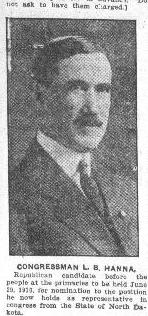

ndhi_gorn_ver01_data_sn85042224_00383345649_1910061701_0563_003_0_94


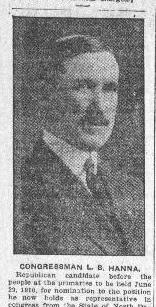

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060601_0412_003_0_95


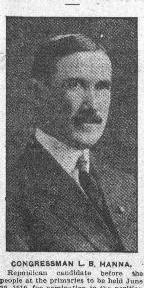

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060901_0449_008_0_96


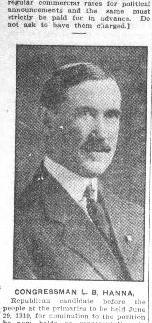

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062401_0643_002_0_96


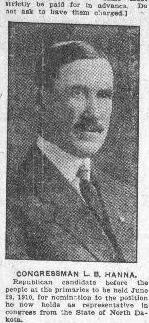

ndhi_gorn_ver01_data_sn85042224_00383345649_1910061401_0524_006_0_95


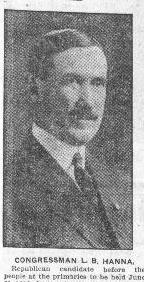

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060201_0367_004_0_92


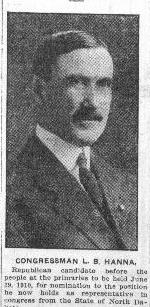

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060801_0437_003_0_97


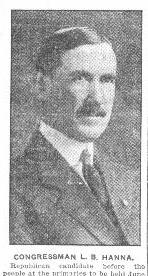

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060401_0403_002_0_97


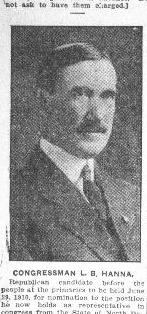

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062101_0605_002_0_96


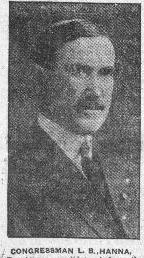

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060701_0425_007_0_94


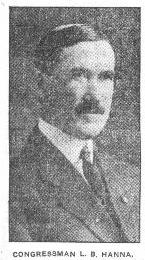

ndhi_gorn_ver01_data_sn85042224_00383345649_1910061801_0582_001_0_93


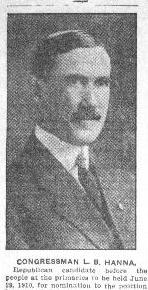

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062201_0617_003_0_95


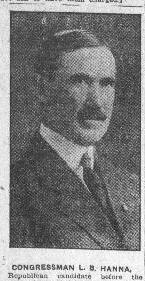

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062001_0595_002_0_96


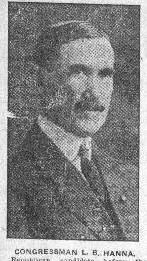

ndhi_gorn_ver01_data_sn85042224_00383345649_1910060101_0350_006_0_97


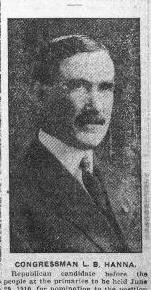

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062301_0631_005_0_93


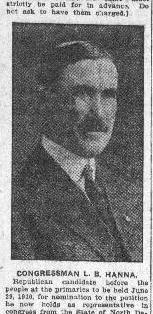

ndhi_gorn_ver01_data_sn85042224_00383345649_1910062701_0675_001_0_96


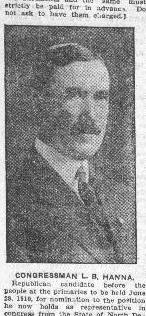

ndhi_gorn_ver01_data_sn85042224_00383345649_1910053101_0339_010_0_91


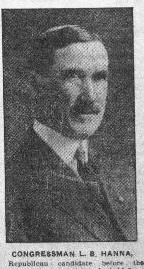

ndhi_gorn_ver01_data_sn85042224_00383345649_1910061601_0550_007_0_93


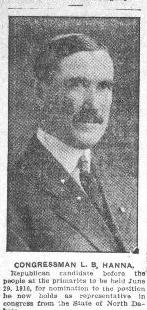

ndhi_gorn_ver01_data_sn85042224_00383345649_1910061301_0514_006_0_92


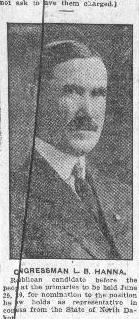

In [6]:
import ipyplot

# quick function for showing a cluster (1 image at a time)
def display_cluster(cluster, max_images = 25):
    for i in range(0, min(len(cluster), max_images)):
        fp = cluster[i]
        local_fp = './../datasets/1910_photos/' + fp + '.jpg'
        print(fp)
        display(IPImage(local_fp))
        
# function using ipyplot
def visualize_cluster(cluster, max_images = 50):
    
    local_cluster = []
    for i in range(0, len(cluster)):
        local_cluster.append('../datasets/1910_photos/' + cluster[i] + '.jpg')
    print(local_cluster)
    
    ipyplot.plot_images(local_cluster, img_width=150)
          
        
c = fetch_cluster(cluster_order[10])
display_cluster(c)  
# visualize_cluster(c)
    